<a href="https://colab.research.google.com/github/Diegorh1/ApoloBarber/blob/main/ML_Rodriguez_Hernandez_Diego%2C_22090737.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#By Rodriguez Hernandez Diego, 22090737.
##Fundamentos de ciencia de datos
###Este notebook es una practica en donde comparamos los diferentes algoritmos de aprendizaje

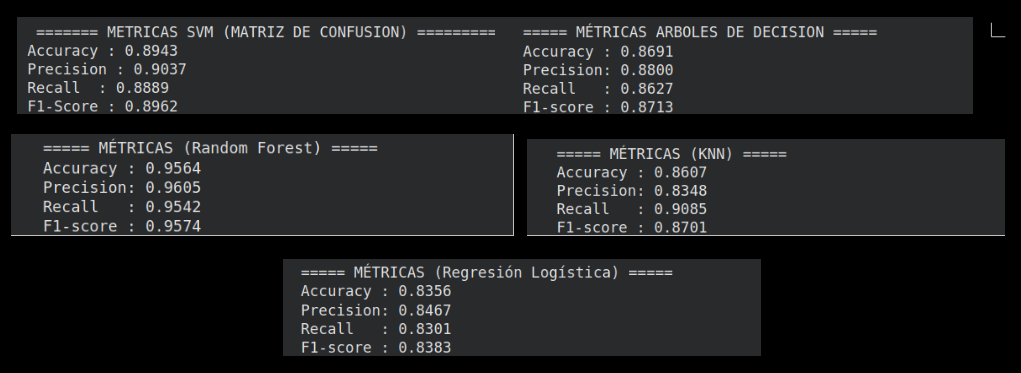

In [ ]:
install.packages('randomForest')
install.packages('rpart')
install.packages('readr')
install.packages('caret')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('tidymodels')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘warp’, ‘lhs’, ‘DiceDesign’, ‘sfd’, ‘patchwork’, ‘fur

In [ ]:
library(randomForest)
library(rpart)
library(readr)
library(caret)
library(ggplot2)
library(dplyr)
library(tidymodels)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice


Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────── tidymodels 1.4.1 ──

✔ broom        1.0.10     ✔ rsample      1.3.1 
✔ dials        1.4.2      ✔ tailor       0.1.0 
✔ infer        1.0.9      ✔ tidyr        1.3.1 
✔ modeldata    1.5.1      ✔ tune         2.0.1 
✔ parsnip      1.3.3      ✔ workflows    1.3.0 
✔ purrr        1.2.0      ✔ workflowsets 1.1.1 
✔ recipes      1.3.1      ✔ yardstick    1.3.2 

── Conflicts ────────────────────────────────────────

In [ ]:
archivo <- '/content/hypertension_dataset.csv'
df <- read_csv(archivo, show_col_types = FALSE)


# 2. Aplicar el Label Encoding a la columna "Condition"
df <- df %>%
  mutate(
    BP_History_encoded = as.numeric(factor(BP_History)),
    Medication_encoded = as.numeric(factor(Medication)),
    Family_History_encoded = as.numeric(factor(Family_History)),
    Exercise_Level_encoded = as.numeric(factor(Exercise_Level)),
    Smoking_Status_encoded = as.numeric(factor(Smoking_Status)),
    Has_Hypertension_encoded = as.numeric(factor(Has_Hypertension))
  )

# 3. Ver el resultado
#df %>%
#  select(type, type_encoded, Condition, Condition_encoded) %>%
#  print( n=10, weight=Inf )

# 4. Quitamos las columnas

df <- df %>%
  select(-BP_History, -Medication, -Family_History, -Exercise_Level, -Smoking_Status,-Has_Hypertension)

# 2. DEfinir la columna tipo target o objetivo (Clasificacion)
target <- 'Has_Hypertension_encoded'
df[[target]] <- as.factor(df[[target]])

# === 3) Dividir en train/test ===
set.seed(42)
train_size <- 0.7
idx <- sample(1:nrow(df), train_size * nrow(df))
train <- df[idx, ]
test  <- df[-idx, ]

#visualizamos el archivo ya sin las columnas de tipo String solamente los tipo dobles y los nuevos
head(df)

Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI,BP_History_encoded,Medication_encoded,Family_History_encoded,Exercise_Level_encoded,Smoking_Status_encoded,Has_Hypertension_encoded
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
69,8.0,9,6.4,25.8,2,4,2,2,1,2
32,11.7,10,5.4,23.4,2,4,1,2,1,1
78,9.5,3,7.1,18.7,2,4,1,3,1,1
38,10.0,10,4.2,22.1,1,1,1,2,1,2
41,9.8,1,5.8,16.2,3,5,1,3,1,1
20,10.8,3,5.2,21.9,1,2,2,1,1,2


>Algoritmo de RandomForest (Eleccion)


===== MÉTRICAS (Random Forest) =====
Accuracy : 0.9564
Precision: 0.9605
Recall   : 0.9542
F1-score : 0.9574


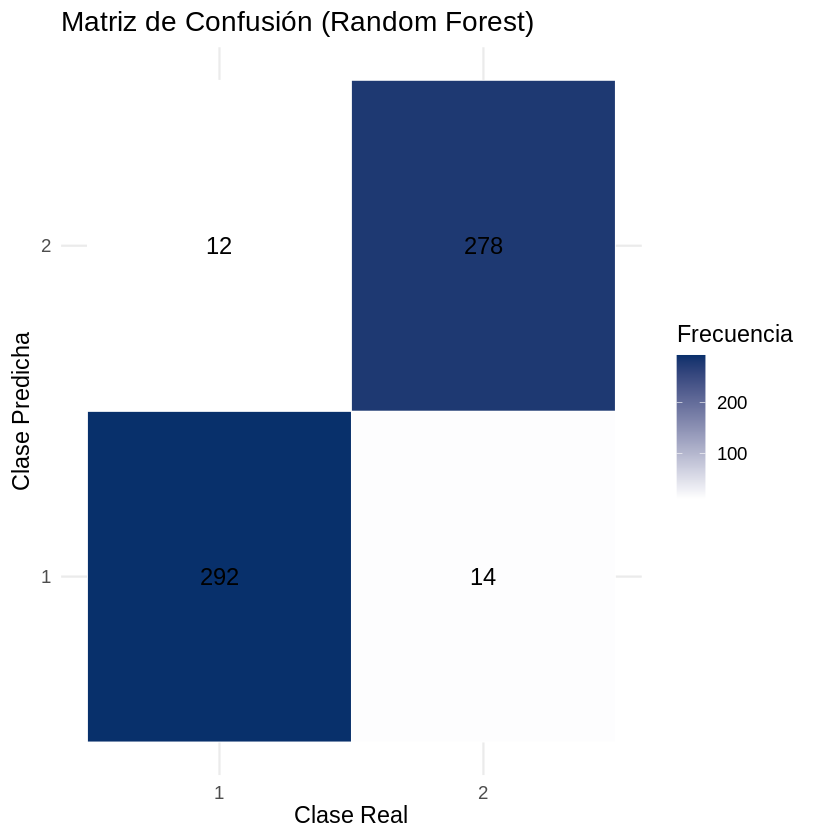

In [ ]:
library(readr)
library(caret)
library(ggplot2)
library(dplyr)
library(tidyr)
library(randomForest)

# === 4) Entrenar modelo Random Forest ===
modelo <- randomForest(
  as.formula(paste(target, "~ .")),
  data = train,
  ntree = 300,        # número de árboles
  mtry = floor(sqrt(ncol(train) - 1)), # número de variables por split
  importance = TRUE
)

# === 5) Predicciones ===
pred <- predict(modelo, newdata = test)

# === 6) Matriz de confusión y métricas ===
cm <- confusionMatrix(pred, test[[target]])

# === Convertir matriz para ggplot ===
cm_df <- as.data.frame(cm$table)
colnames(cm_df) <- c("Referencia", "Predicción", "Frecuencia")

# === Mapa de calor ===
ggplot(cm_df, aes(x = Referencia, y = Predicción, fill = Frecuencia)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Frecuencia), color = "black", size = 5) +
  scale_fill_gradient(low = "#ffffffff", high = "#08306b") +
  labs(
    title = "Matriz de Confusión (Random Forest)",
    x = "Clase Real", y = "Clase Predicha", fill = "Frecuencia"
  ) +
  theme_minimal(base_size = 14)

# === 7) Métricas ===
byc <- cm$byClass
if (is.null(dim(byc))) {
  precision <- byc["Precision"]
  recall    <- byc["Recall"]
  f1        <- byc["F1"]
} else {
  precision <- mean(byc[, "Precision"], na.rm = TRUE)
  recall    <- mean(byc[, "Recall"], na.rm = TRUE)
  f1        <- mean(byc[, "F1"], na.rm = TRUE)
}

cat("\n===== MÉTRICAS (Random Forest) =====\n")
cat(sprintf("Accuracy : %.4f\n", cm$overall["Accuracy"]))
cat(sprintf("Precision: %.4f\n", precision))
cat(sprintf("Recall   : %.4f\n", recall))
cat(sprintf("F1-score : %.4f\n", f1))

>Algoritmo de SVM Maquina de soporte vectorial

          Reference
Prediction   1   2
         1 272  29
         2  34 261


Ignoring unknown labels:
• tittle : "Matriz de confusion"



 ======= METRICAS SVM (MATRIZ DE CONFUSION) =========
Accuracy : 0.8943
Precision : 0.9037
Recall  : 0.8889
F1-Score : 0.8962


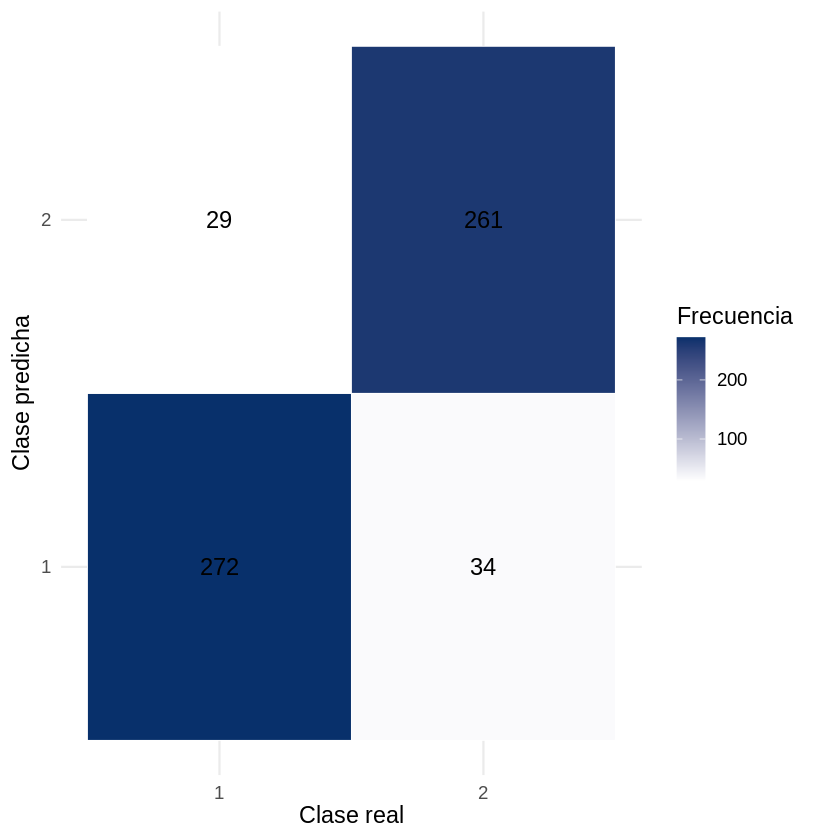

In [ ]:
library(e1071)
#4)Entrenar modelo SVM
modelo <- svm(as.formula(paste(target, "~ .")), data = train, kernel = "radial", scale = TRUE)
# kernel = linear, polynomial, radial = gauss, sigmoid

#5)Predicciones
pred <- predict(modelo, newdata = test)

#6 Matriz de confusion y metricas
cm <- confusionMatrix(pred, test[[target]])

print(cm$table)
# ==== Convertir matriz a formato largo para ggplot2
cm_df <- as.data.frame(cm$table)
colnames(cm_df) <- c("Referencia", "Prediccion", "Frecuencia")

# === Mapa de calor con GGPLOT2 ===
ggplot(cm_df, aes(x = Referencia, y = Prediccion, fill = Frecuencia)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Frecuencia),
  color = "black", size = 5) +
  scale_fill_gradient(low = "#ffffff", high = "#08306b") +
  labs(tittle = "Matriz de confusion", x = "Clase real", y = "Clase predicha",fill = "Frecuencia") +
  theme_minimal(base_size = 14)

# metricas resumidas
byc <- cm$byClass
if(is.null(dim(byc))) {
  precision <- byc["Precision"]
  recall <- byc["Recall"]
  f1 <- byc["F1"]
} else {
  precision <- mean(byc[, "Precision"], na.rm = TRUE)
  recall <- mean(byc[, "Recall"], na.rm = TRUE)
  f1 <- mean(byc[, "F1"], na.rm = TRUE)
}

cat("\n ======= METRICAS SVM (MATRIZ DE CONFUSION) =========\n")
cat(sprintf("Accuracy : %.4f\n", cm$overall["Accuracy"]))
cat(sprintf("Precision : %.4f\n", precision))
cat(sprintf("Recall  : %.4f\n", recall))
cat(sprintf("F1-Score : %.4f\n", f1))

>Algoritmo de arboles de decision (rpart)


===== MÉTRICAS ARBOLES DE DECISION =====
Accuracy : 0.8691
Precision: 0.8800
Recall   : 0.8627
F1-score : 0.8713


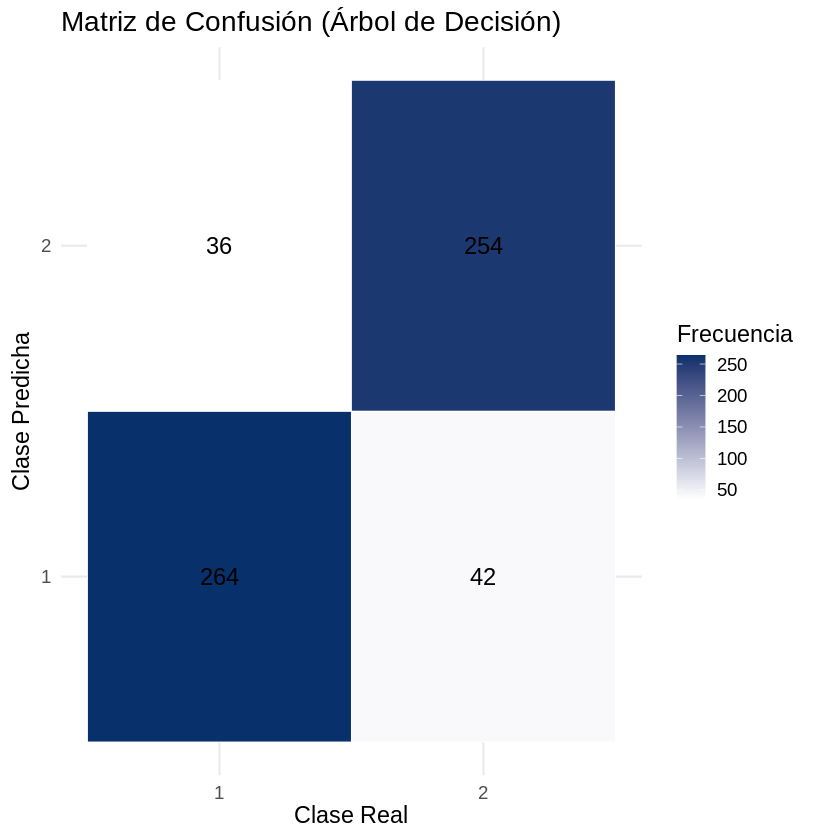

In [ ]:
library(caret)
library(ggplot2)
library(dplyr)
library(tidyr)
library(rpart)
#library(rpart.plot)  # opcional para dibujar el árbol

# 4) Entrenar modelo Árbol de Decisión (rpart)
#    Puedes ajustar cp (complejidad), minsplit, maxdepth, etc.
modelo <- rpart(
  formula = as.formula(paste(target, "~ .")),
  data = train,
  method = "class",
  control = rpart.control(cp = 0.01, minsplit = 20, maxdepth = 30)
)

# (Opcional) ver el árbol
#rpart.plot(modelo, type = 2, extra = 104, fallen.leaves = TRUE, cex = 0.7)

# 5) Predicciones
pred <- predict(modelo, newdata = test, type = "class")

# 6) Matriz de confusión y métricas
cm <- confusionMatrix(pred, test[[target]])

# === Convertir matriz a formato largo para ggplot2 ===
cm_df <- as.data.frame(cm$table)
colnames(cm_df) <- c("Referencia", "Predicción", "Frecuencia")

# === Mapa de calor con ggplot2 ===
ggplot(cm_df, aes(x = Referencia, y = Predicción, fill = Frecuencia)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Frecuencia), color = "black", size = 5) +
  scale_fill_gradient(low = "#ffffffff", high = "#08306b") +
  labs(
    title = "Matriz de Confusión (Árbol de Decisión)",
    x = "Clase Real", y = "Clase Predicha", fill = "Frecuencia"
  ) +
  theme_minimal(base_size = 14)

# === Métricas resumidas ===
byc <- cm$byClass
if (is.null(dim(byc))) {
  precision <- byc["Precision"]
  recall    <- byc["Recall"]
  f1        <- byc["F1"]
} else {
  precision <- mean(byc[, "Precision"], na.rm = TRUE)
  recall    <- mean(byc[, "Recall"], na.rm = TRUE)
  f1        <- mean(byc[, "F1"], na.rm = TRUE)
}

cat("\n===== MÉTRICAS ARBOLES DE DECISION =====\n")
cat(sprintf("Accuracy : %.4f\n", cm$overall["Accuracy"]))
cat(sprintf("Precision: %.4f\n", precision))
cat(sprintf("Recall   : %.4f\n", recall))
cat(sprintf("F1-score : %.4f\n", f1))

>Modelo KNN Vecinos mas cercanos

k-Nearest Neighbors 

1389 samples
  10 predictor
   2 classes: '1', '2' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1111, 1112, 1112, 1110, 1111 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8430737  0.6873855
   7  0.8445256  0.6905300
   9  0.8517380  0.7046829
  11  0.8509979  0.7033022
  13  0.8473904  0.6960942
  15  0.8416401  0.6846492
  17  0.8438114  0.6889957
  19  0.8473930  0.6961943
  21  0.8380352  0.6779967
  23  0.8401831  0.6821666

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

===== MÉTRICAS (KNN) =====
Accuracy : 0.8607
Precision: 0.8348
Recall   : 0.9085
F1-score : 0.8701


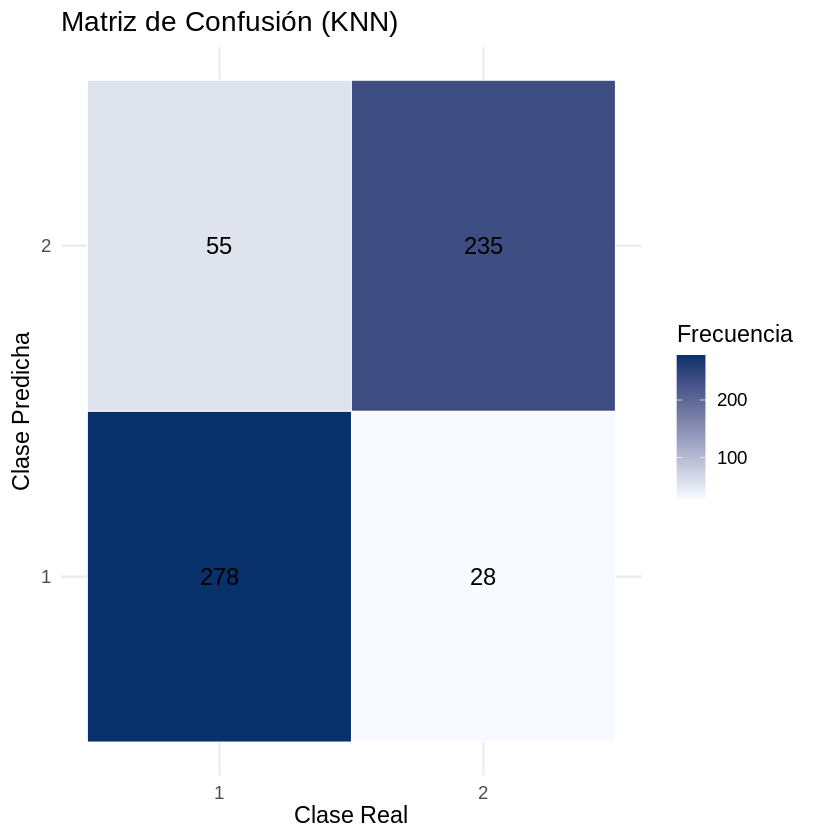

In [ ]:
# === 4) Entrenar modelo KNN ===
# El método "knn" se entrena con la función train() de caret
control <- trainControl(method = "cv", number = 5)  # validación cruzada 5-fold

modelo <- train(
  as.formula(paste(target, "~ .")),
  data = train,
  method = "knn",
  trControl = control,
  preProcess = c("center", "scale"),  # normaliza los datos
  tuneLength = 10                     # prueba varios valores de k
)

# Mostrar los mejores parámetros
print(modelo)

# === 5) Predicciones ===
pred <- predict(modelo, newdata = test)

# === 6) Matriz de confusión y métricas ===
cm <- confusionMatrix(pred, test[[target]])

# === Convertir matriz para ggplot ===
cm_df <- as.data.frame(cm$table)
colnames(cm_df) <- c("Referencia", "Predicción", "Frecuencia")

# === 7) Mapa de calor ===
ggplot(cm_df, aes(x = Referencia, y = Predicción, fill = Frecuencia)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Frecuencia), color = "black", size = 5) +
  scale_fill_gradient(low = "#f7fbff", high = "#08306b") +
  labs(
    title = "Matriz de Confusión (KNN)",
    x = "Clase Real", y = "Clase Predicha", fill = "Frecuencia"
  ) +
  theme_minimal(base_size = 14)

# === 8) Métricas ===
byc <- cm$byClass
if (is.null(dim(byc))) {
  precision <- byc["Precision"]
  recall    <- byc["Recall"]
  f1        <- byc["F1"]
} else {
  precision <- mean(byc[, "Precision"], na.rm = TRUE)
  recall    <- mean(byc[, "Recall"], na.rm = TRUE)
  f1        <- mean(byc[, "F1"], na.rm = TRUE)
}

cat("\n===== MÉTRICAS (KNN) =====\n")
cat(sprintf("Accuracy : %.4f\n", cm$overall["Accuracy"]))
cat(sprintf("Precision: %.4f\n", precision))
cat(sprintf("Recall   : %.4f\n", recall))
cat(sprintf("F1-score : %.4f\n", f1))

>Regresion Logistica


Call:
NULL

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -7.918455   0.897955  -8.818  < 2e-16 ***
Age                     0.049819   0.004585  10.866  < 2e-16 ***
Salt_Intake             0.234844   0.040864   5.747 9.08e-09 ***
Stress_Score            0.256751   0.027218   9.433  < 2e-16 ***
Sleep_Duration         -0.422955   0.053919  -7.844 4.35e-15 ***
BMI                     0.137702   0.018260   7.541 4.66e-14 ***
BP_History_encoded     -2.239117   0.136175 -16.443  < 2e-16 ***
Medication_encoded      0.029150   0.061555   0.474   0.6358    
Family_History_encoded  2.220420   0.182731  12.151  < 2e-16 ***
Exercise_Level_encoded -0.223231   0.111904  -1.995   0.0461 *  
Smoking_Status_encoded  2.432531   0.207250  11.737  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1919.1  on 1388  degrees of freedom
Residual dev

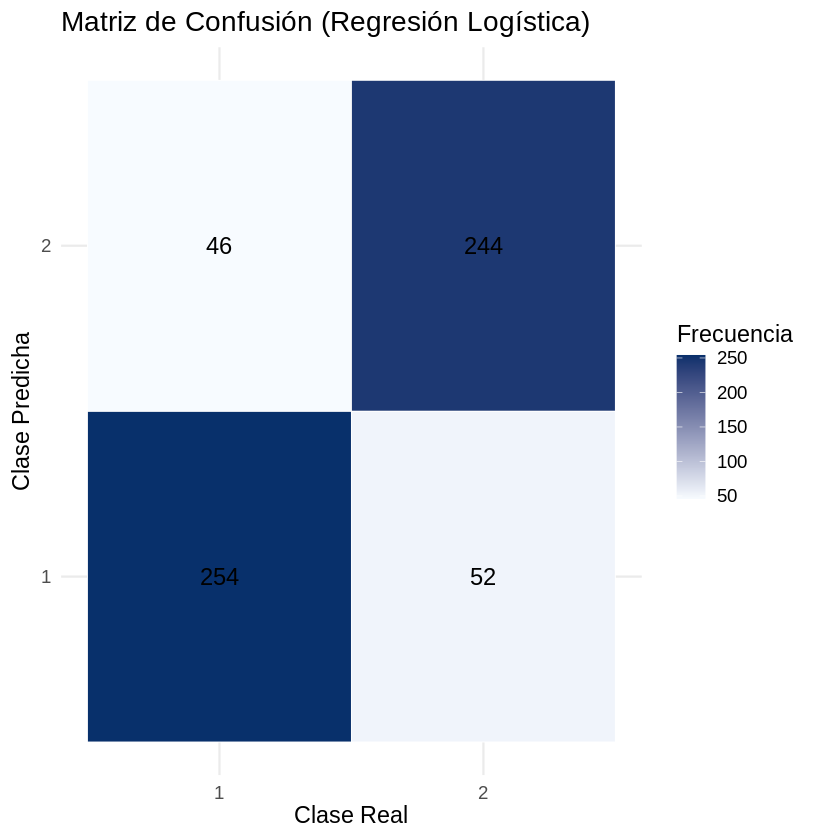

In [ ]:
# === 4) Entrenar modelo REGRESIÓN LOGÍSTICA ===
# Usamos el método "glm" (Generalized Linear Model)
# y especificamos family = "binomial" para regresión logística.

control <- trainControl(method = "cv", number = 5)  # validación cruzada 5-fold

# NOTA: Los parámetros preProcess y tuneLength se eliminaron,
# ya que no son necesarios para un 'glm' básico.
modelo_lr <- train(   # Renombrado a modelo_lr
  as.formula(paste(target, "~ .")),
  data = train,
  method = "glm",         # <--- CAMBIO PRINCIPAL
  family = "binomial",  # <--- ESPECÍFICO DE REGRESIÓN LOGÍSTICA
  trControl = control
)

# Mostrar resumen del modelo (summary es más útil aquí que print)
print(summary(modelo_lr))

# === 5) Predicciones ===
# Usamos el nuevo modelo logístico
pred_lr <- predict(modelo_lr, newdata = test)

# === 6) Matriz de confusión y métricas ===
# Creamos una nueva matriz de confusión para el modelo logístico
cm_lr <- confusionMatrix(pred_lr, test[[target]])

# === Convertir matriz para ggplot ===
cm_df_lr <- as.data.frame(cm_lr$table) # Usamos cm_lr
colnames(cm_df_lr) <- c("Referencia", "Predicción", "Frecuencia")

# === 7) Mapa de calor ===
ggplot(cm_df_lr, aes(x = Referencia, y = Predicción, fill = Frecuencia)) + # Usamos cm_df_lr
  geom_tile(color = "white") +
  geom_text(aes(label = Frecuencia), color = "black", size = 5) +
  scale_fill_gradient(low = "#f7fbff", high = "#08306b") +
  labs(
    title = "Matriz de Confusión (Regresión Logística)", # <--- Título actualizado
    x = "Clase Real", y = "Clase Predicha", fill = "Frecuencia"
  ) +
  theme_minimal(base_size = 14)

# === 8) Métricas ===
byc_lr <- cm_lr$byClass # Usamos cm_lr
if (is.null(dim(byc_lr))) {
  precision_lr <- byc_lr["Precision"]
  recall_lr    <- byc_lr["Recall"]
  f1_lr        <- byc_lr["F1"]
} else {
  precision_lr <- mean(byc_lr[, "Precision"], na.rm = TRUE)
  recall_lr    <- mean(byc_lr[, "Recall"], na.rm = TRUE)
  f1_lr        <- mean(byc_lr[, "F1"], na.rm = TRUE)
}

cat("\n===== MÉTRICAS (Regresión Logística) =====\n") # <--- Título actualizado
cat(sprintf("Accuracy : %.4f\n", cm_lr$overall["Accuracy"]))
cat(sprintf("Precision: %.4f\n", precision_lr))
cat(sprintf("Recall   : %.4f\n", recall_lr))
cat(sprintf("F1-score : %.4f\n", f1_lr))